In [1]:
# !pip install download

In [2]:
from __future__ import print_function, absolute_import, division, unicode_literals

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os
from download import download
import plotly.express as px

In [3]:
# fix the rc params to make plots pretty
mpl.rcParams.update({'font.size': 16, 'figure.figsize': (10, 6)})
# axes
mpl.rcParams['axes.grid'] = False

In [4]:
df = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [8]:
# combine the yer, month, day, hour columns into a single datetime column and drop the original columns set index to datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# df = df.set_index('datetime')
# df = df.drop(columns=['year', 'month', 'day', 'hour'])

In [9]:
datetime_col = df.pop('datetime')
df.insert(1, 'datetime', datetime_col)

In [10]:
df.head()

,No,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013-03-01 01:00:00,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013-03-01 02:00:00,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013-03-01 04:00:00,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   datetime  35064 non-null  datetime64[ns]
 2   year      35064 non-null  int64         
 3   month     35064 non-null  int64         
 4   day       35064 non-null  int64         
 5   hour      35064 non-null  int64         
 6   PM2.5     34285 non-null  float64       
 7   PM10      34408 non-null  float64       
 8   SO2       34334 non-null  float64       
 9   NO2       33830 non-null  float64       
 10  CO        33052 non-null  float64       
 11  O3        33850 non-null  float64       
 12  TEMP      35011 non-null  float64       
 13  PRES      35014 non-null  float64       
 14  DEWP      35011 non-null  float64       
 15  RAIN      35013 non-null  float64       
 16  wd        34924 non-null  object        
 17  WSPM      35

In [12]:
# !pip install plotly==5.24.1

In [13]:

# set index to datetime
df = df.set_index('datetime')

In [14]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [15]:
df.loc['2013':'2014']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,16100,2014,12,31,19,7.0,37.0,2.0,2.0,300.0,69.0,-2.3,1015.0,-24.8,0.0,NW,2.2,Dingling
2014-12-31 20:00:00,16101,2014,12,31,20,NaN,NaN,NaN,NaN,NaN,NaN,-2.5,1014.0,-24.3,0.0,NNW,2.3,Dingling
2014-12-31 21:00:00,16102,2014,12,31,21,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,1012.0,-23.5,0.0,NW,1.4,Dingling


In [16]:
pm_2_5 = df['PM2.5']
pm_2_5.head()

datetime
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

<Axes: xlabel='datetime'>

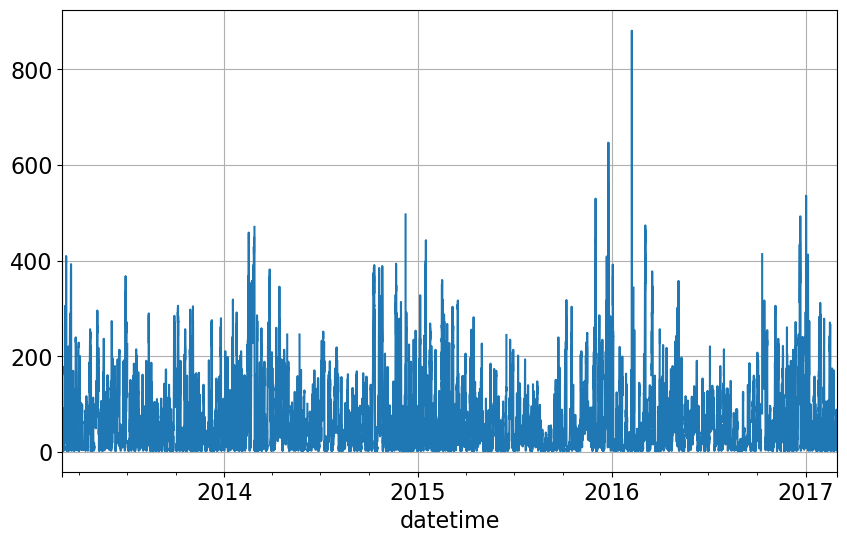

In [17]:
pm_2_5.plot(grid=True)

<Axes: xlabel='datetime'>

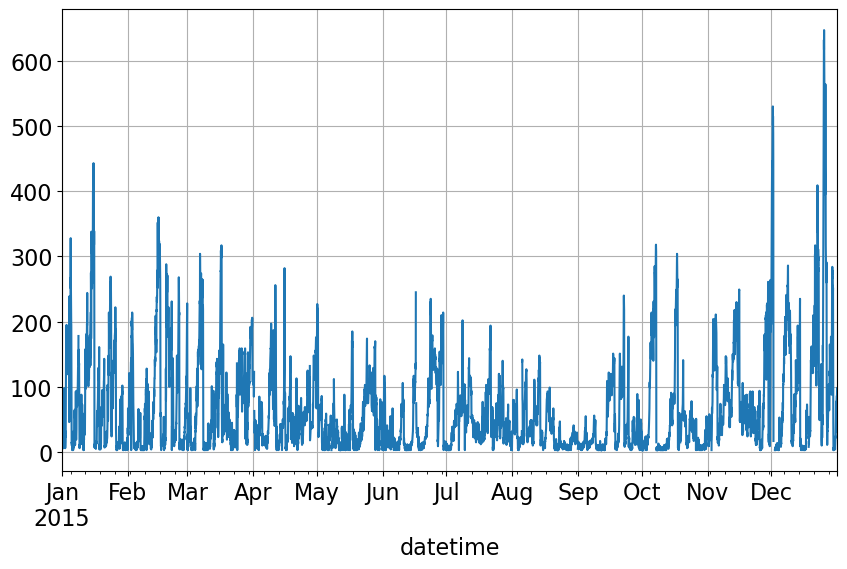

In [18]:
pm_2015 = df.loc['2015']
pm_2015 = pm_2015['PM2.5']
pm_2015.plot(grid=True)

<Axes: xlabel='datetime'>

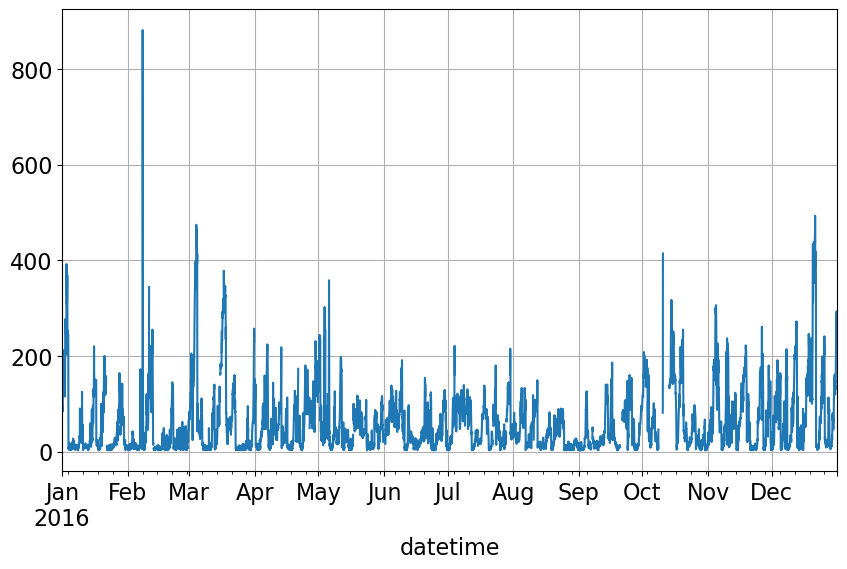

In [19]:
pm_2016 = df.loc['2016']
pm_2016 = pm_2016['PM2.5']
pm_2016.plot(grid=True)

In [26]:
fig = px.line(df, x=df.index, y='PM2.5', title='PM2.5 over time')
# change the fig size
fig.update_layout(width=1400, height=800)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [29]:
fig = px.line(df, x=df.index, y='PM2.5', title='PM2.5 over time')
# change the fig size
fig.update_layout(width=1400, height=800)
# putting the buttons
fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
                     buttons=list([
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=2, label="2y", step="year", stepmode="backward"),
                         dict(count=3, label="3y", step="year", stepmode="backward"),
                        #  dict(count=4, label="4y", step="year", stepmode="backward"),
                        #  dict(count=5, label="5y", step="year", stepmode="backward"),
                         dict(step="all")
                     ])
                 )
                 )
fig.show()